# Classificazione video con metodi tradizionali


## Import delle librerie

In [1]:
from app.dataset.dataset import Dataset
from model.dtw_classifier import DTWClassifier
from model.model_statistics import ModelStatistics

import matplotlib.pyplot as plt

## Import del dataset



In [2]:
dataset = Dataset("data/WLASL_v0.3.json")

## Creazione del classificatore


In [3]:
dtw_classifier = DTWClassifier(dataset, dataset.glosses)

## Suddivisione del dataset in training e test set

In [4]:
dtw_classifier.train_test_videos(num_glosses=5)

Train videos: 38, Test videos: 14


## Calcolo delle distanze tra i video del test set e quelli del training set

In [5]:
X_test, y_train, y_test = dtw_classifier.compute_dtw_similarity_matrix()
y_pred = dtw_classifier.dtw_predict(X_test, y_train)

Processing video: 1/532
Processing video pair: data/videos/69302.mp4 and data/videos/65539.mp4
len 1st: 76, 2nd: 43
Caricamento da file: data/hf/69302/hog_features
hog_features shape: (76, 26244)
Caricamento da file: data/hf/69302/lbp_features
lbp_features shape: (76, 27)
Caricamento da file: data/hf/65539/hog_features
hog_features shape: (43, 26244)
Caricamento da file: data/hf/65539/lbp_features
lbp_features shape: (43, 27)
Similarity: 0.36788111844103966
Processing video: 2/532
Processing video pair: data/videos/69302.mp4 and data/videos/17710.mp4
len 1st: 76, 2nd: 69
Caricamento da file: data/hf/69302/hog_features
hog_features shape: (76, 26244)
Caricamento da file: data/hf/69302/lbp_features
lbp_features shape: (76, 27)
Caricamento da file: data/hf/17710/hog_features
hog_features shape: (69, 26244)
Caricamento da file: data/hf/17710/lbp_features
lbp_features shape: (69, 27)
Similarity: 0.36788159541346965
Processing video: 3/532
Processing video pair: data/videos/69302.mp4 and dat

## Stampa dei risultati

In [6]:
model_stats = ModelStatistics(save_name="confusion_matrix_trad")
model_stats.print_classification_report(y_test, y_pred)
model_stats.print_accuracy(y_test, y_pred)

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.75      0.75         4
           2       0.67      1.00      0.80         4
           3       0.50      0.50      0.50         4
           4       1.00      0.00      0.00         2

    accuracy                           0.64        14
   macro avg       0.73      0.56      0.51        14
weighted avg       0.69      0.64      0.59        14

Accuracy: 64.29%


## Stampa della confusion matrix

Confusion matrix saved at plots/confusion_matrix_trad.png


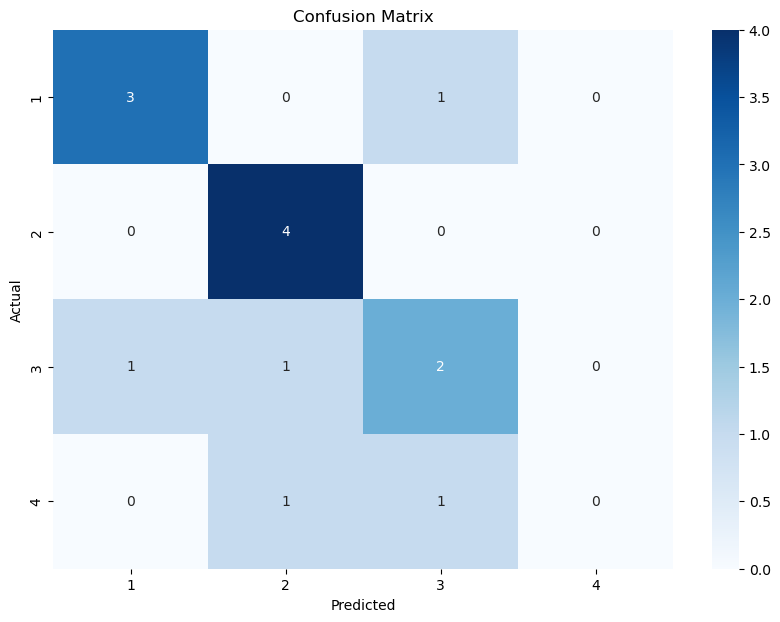

In [7]:
model_stats.plot_confusion_matrix(y_test, y_pred)

## Stampa dell'istogramma dei risultati
L'istogramma mostra la similarità tra i video classificati correttamente e quelli classificati in modo errato.
Si può notare come i valori di similarità tra video classificati correttamente e in maniera errata siano molto vicini, questo è dovuto al fatto che le feature estratte dai video (hog, lbp) sono molto complesse e non permettono di catturare le differenze tra i vari movimenti dei soggetti.

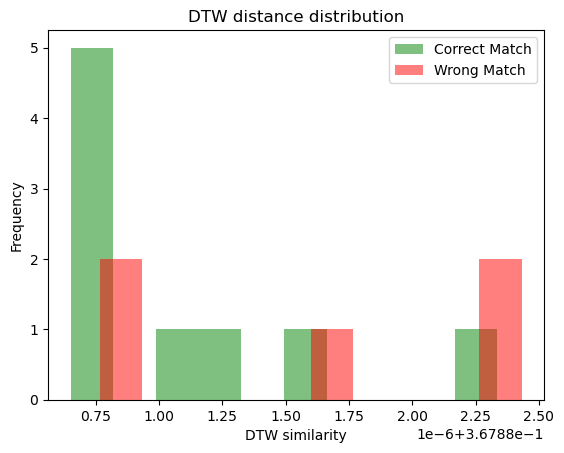

In [8]:
dtw_correct = [
    X_test[i][0] for i in range(len(X_test)) if y_test[i] == y_pred[i]
]
dtw_wrong = [
    X_test[i][0] for i in range(len(X_test)) if y_test[i] != y_pred[i]
]

plt.hist(dtw_correct, bins=10, alpha=0.5, label="Correct Match", color="green")
plt.hist(dtw_wrong, bins=10, alpha=0.5, label="Wrong Match", color="red")
plt.xlabel("DTW similarity")
plt.ylabel("Frequency")
plt.legend()
plt.title("DTW distance distribution")
plt.show()

In [9]:
print(dtw_correct)
print(dtw_wrong)

[0.36788111844103966, 0.3678808002247672, 0.36788080147183755, 0.3678806552830436, 0.3678816134243594, 0.36788065196781294, 0.3678811582761312, 0.36788072975224334, 0.3678823365394976]
[0.3678824319523457, 0.3678808671409364, 0.3678817582381441, 0.36788076796461483, 0.36788227147291536]
